In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train.csv')
X_train=train.iloc[:,:-2].values
Y_train=train.iloc[:,-1].values
print(Y_train.reshape(-1,1).shape)

(7352, 1)


In [3]:
test=pd.read_csv('test.csv')
X_test=test.iloc[:,:-2].values
Y_test=test.iloc[:,-1].values

In [4]:
sub_id_train=pd.read_csv('UCI HAR/Train/subject_id_train.txt',header=None)

In [5]:
print(sub_id_train.shape)

(7767, 1)


In [6]:
#list of all subject id for the whole dataset
sub_map=list(sub_id_train[0])

In [7]:
# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
    # get row indexes for the subject id
    ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
    # return the selected samples
    return X[ix, :], y[ix]

In [8]:
# Getting all the data for subject 1
x_,y_=data_for_subject(X_train,Y_train,sub_map,1)

In [9]:
print((x_.shape))
#that means there are 368 no of records for subject 1

(368, 561)


In [10]:
print((x_[0]).shape) # No of columns for subject 1.

(561,)


In [11]:
print(y_.shape) # Activity labels for subject 1

(368,)


### Distribution of Data based on the source 

In [12]:
accel,gyro,others=0,0,0
for column in train.columns:
    if 'Acc' in column:
        accel+=1
    elif 'Gyro' in column:
        gyro+=1
    else:   
        others+=1

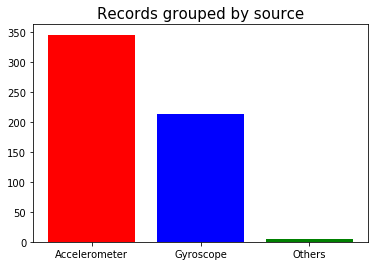

In [13]:
plt.bar(['Accelerometer', 'Gyroscope', 'Others'], [accel, gyro, others], color = ('r', 'b', 'g'))
plt.title("Records grouped by source",size=15)
plt.show()

### Distribution of Data based on subject

In [14]:
st=pd.value_counts(train['Sub_ID']).sort_index(axis=0)
print(st)
av_sub=list(st.index)
print(len(av_sub))

1     347
3     341
5     302
6     325
7     308
8     281
11    316
14    323
15    328
16    366
17    368
19    360
21    408
22    321
23    372
25    409
26    392
27    376
28    382
29    344
30    383
Name: Sub_ID, dtype: int64
21


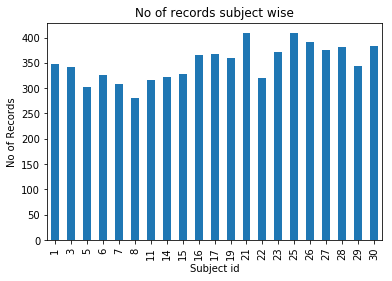

In [15]:
st.plot.bar()
plt.ylabel("No of Records")
plt.xlabel("Subject id")
plt.title("No of records subject wise")
plt.show()

### Plotting mean data for one subject 

In [16]:
chosen_col=['tGravityAcc-mean()-X','tGravityAcc-mean()-Y','tGravityAcc-mean()-Z','tBodyGyro-mean()-X','tBodyGyro-mean()-Y','tBodyGyro-mean()-Z','tBodyAcc-mean()-X','tBodyAcc-mean()-Y','tBodyAcc-mean()-Z']

In [17]:
def plot_sub(subject,opt):
    if (subject not in av_sub):
        print("Sorry No Data avaialble for Sub:",subject)
        print("Choose from this list:")
        print(av_sub)
    else:    
        x_d,y_d=data_for_subject(X_train,Y_train,sub_map,subject)
        sub_df=pd.DataFrame(x_d,columns=train.columns[:-2])
        # Option 1 Histogram
        if (opt ==1):
            hist=test_df[chosen_col].hist(figsize=(10,10))
            plt.suptitle("Data Distribution for subject : %d" %subject,size=20) #Title for the main figure
            plt.show()
        # Option 2 simple distribution plot    
        elif (opt == 2):
            sub_df[chosen_col].plot(figsize=(10,10),subplots=True)
            plt.suptitle("Data Distribution for subject : %d" %subject,size=20) #Title for the main figure
            plt.show()
        else:
            print("Plot type unavailable . Please choose 1 or 2")

In [18]:
# Function to take input from user for particular subject
def visualize():
    while(1):
        ch=int(input("Enter a Subject id"))
        pl=int(input("Enter the plot type (1 for histogram && 2 for line plot)"))
        plot_sub(ch,pl)
        ex=input("DO U wish to continue [ n/N for exit]")
        if(ex=='n'or ex== 'N'):
          break        

Enter a Subject id3
Enter the plot type (1 for histogram && 2 for line plot)2


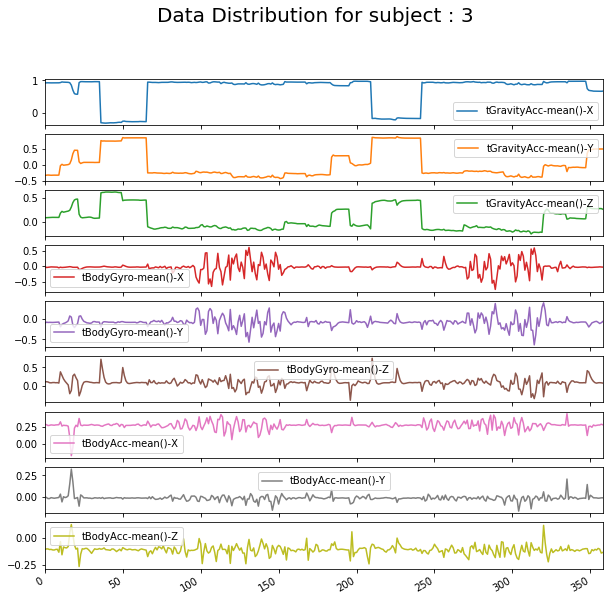

DO U wish to continue [ n/N for exit]y
Enter a Subject id2
Enter the plot type (1 for histogram && 2 for line plot)1
Sorry No Data avaialble for Sub: 2
Choose from this list:
[1, 3, 5, 6, 7, 8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30]
DO U wish to continue [ n/N for exit]n


In [19]:
visualize()